# KAN4baseflow

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

# Input

In [3]:
dir_in = r'./Datasets/Meira Neto et al 2020.xlsx' 
dir_out = r'./kan4baseflow' 

In [4]:
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

# Helper functions

In [5]:
def fb(phi):
    return pow(np.exp(-phi**1.71 - 0.873), 1.05)
def kan(phi):
    return 0.39-0.34*np.tanh(1.42*phi-0.82)

# Load and preprocessing data

In [6]:
df_all = pd.read_excel(dir_in)

In [7]:
df_all['Qd_hat/P_hat_true'] = df_all['Qd']/df_all['P']
df_all['Qb_hat/P_hat_true'] = df_all['Qb']/df_all['P']
df_all['PET'] = df_all['Phi'] * df_all['P']

# Data analysis

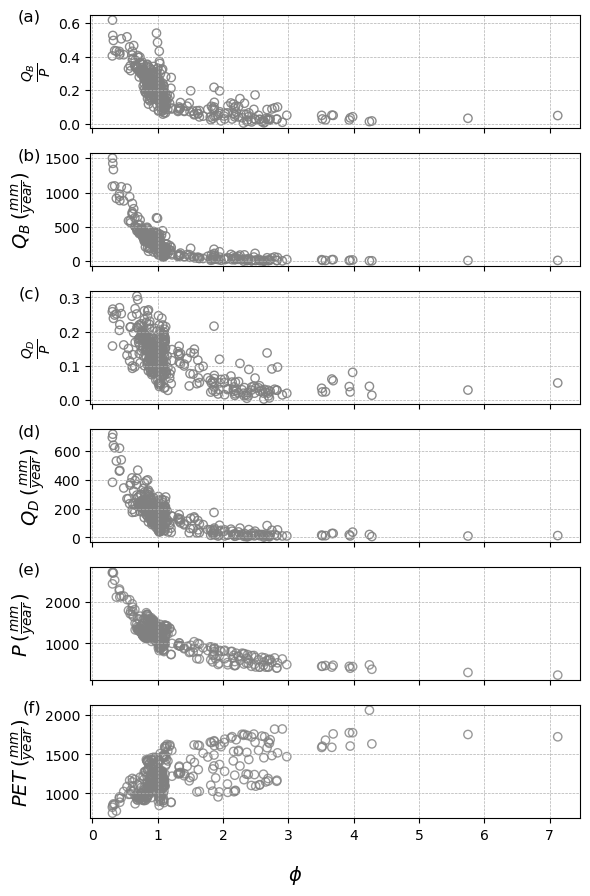

In [8]:
import matplotlib.pyplot as plt

plt.style.use('default')
fig, ax = plt.subplots(6, 1, figsize=(6, 9), sharex=True)

ax[0].scatter(df_all['Phi'], df_all['Qb_hat/P_hat_true'], marker='o', facecolor='none', edgecolor='grey', alpha=0.9)
ax[0].set_ylabel(r'$\frac{Q_B}{P}$', fontsize=14)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].text(-0.1, 1.05, '(a)', transform=ax[0].transAxes, fontsize=12,
           va='top', ha='right')

ax[1].scatter(df_all['Phi'], df_all['Qb'], marker='o', facecolor='none', edgecolor='grey', alpha=0.9)
ax[1].set_ylabel(r'$Q_B \: (\frac{mm}{year})$', fontsize=14)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].text(-0.1, 1.05, '(b)', transform=ax[1].transAxes, fontsize=12,
           va='top', ha='right')

ax[2].scatter(df_all['Phi'], df_all['Qd_hat/P_hat_true'], marker='o', facecolor='none', edgecolor='grey', alpha=0.9)
ax[2].set_ylabel(r'$\frac{Q_D}{P}$', fontsize=14)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[2].text(-0.1, 1.05, '(c)', transform=ax[2].transAxes, fontsize=12,
           va='top', ha='right')

ax[3].scatter(df_all['Phi'], df_all['Qd'], marker='o', facecolor='none', edgecolor='grey', alpha=0.9)
ax[3].set_ylabel(r'$Q_D \: (\frac{mm}{year})$', fontsize=14)
ax[3].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[3].text(-0.1, 1.05, '(d)', transform=ax[3].transAxes, fontsize=12,
           va='top', ha='right')

ax[4].scatter(df_all['Phi'], df_all['P'], marker='o', facecolor='none', edgecolor='grey', alpha=0.8)
ax[4].set_ylabel(r'$P \: (\frac{mm}{year})$', fontsize=14)
ax[4].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[4].text(-0.1, 1.05, '(e)', transform=ax[4].transAxes, fontsize=12, va='top', ha='right')

ax[5].scatter(df_all['Phi'], df_all['PET'], marker='o', facecolor='none', edgecolor='grey', alpha=0.8)
ax[5].set_ylabel(r'$PET \: (\frac{mm}{year})$', fontsize=14)
ax[5].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[5].text(-0.1, 1.05, '(f)', transform=ax[5].transAxes, fontsize=12,
           va='top', ha='right')

fig.supxlabel(r'$\phi$', ha='center', fontsize=14)

plt.tight_layout()
plt.savefig(r'./kan4baseflow/all_mean_annual_phi.png', dpi=300)
plt.show()


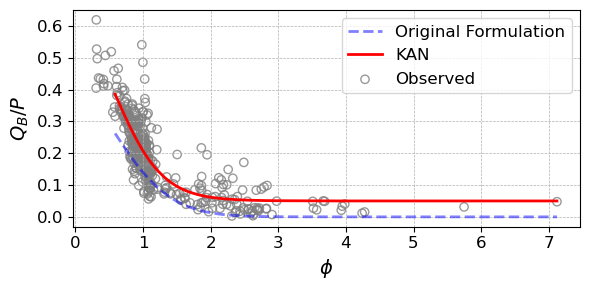

In [9]:
X = df_all[['Phi']].values.copy()
y = df_all['Qb_hat/P_hat_true'].values.reshape(-1, 1)
func = fb

fd_vectorized = np.vectorize(func)
kan_vectorized = np.vectorize(kan)

y_fb_predicted = fd_vectorized(X).flatten()
y_kan_predicted = kan_vectorized(X).flatten()

x_temp1, y_temp1 = zip(*sorted(zip(X, y_fb_predicted)))
x_temp2, y_temp2 = zip(*sorted(zip(X, y_kan_predicted)))

plt.figure(figsize=(6, 3))
plt.plot(x_temp1[15:], y_temp1[15:], label='Original Formulation', linestyle='--', linewidth=2, color='b', alpha = 0.5)
plt.plot(x_temp2[15:], y_temp2[15:], label='KAN', linestyle='-', linewidth=2, color='red')
plt.scatter(X, y, label='Observed', marker='o', facecolor='none', edgecolor='grey', alpha=0.8)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$Q_B/P$', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.savefig(r'./kan4baseflow/KAN_vs_Aridity_Index.png', dpi=300)

plt.show()